# Posgrado Data Science & Machine Learning UB

_Pol Reviejo_

En este codigo se genera la base de datos de modelización para entrenar los modelos

In [1]:
!pip install pyarrow
import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt
import os

El fichero con los datos ```cleaned_data.parquet``` se ha de encontrar en el mismo directorio de trabajo que donde estamos

In [2]:
os.getcwd()

'C:\\Users\\mario\\OneDrive\\Desktop\\UB_DATA_SCIENCE_AND_MACHINE_LEARNING\\CAPSTONE_PROJECT'

In [3]:
parquet_file = 'cleaned_data.parquet'
parquet_file

'cleaned_data.parquet'

Importamos los datos y los pasamos a formato dataframe de pandas

In [4]:
parquet_file = 'cleaned_data.parquet'
# Read the Parquet file into a Table
table = pq.read_table(parquet_file)

# Import Parquet data into a DataFrame
df = pd.read_parquet(parquet_file)

# Now you can work with the DataFrame 'df'
df.head()

,station_id,hour,day,month,year,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available
0,1,0,1,1,2020,23.333333,23.166667,0.166667,20.666667
1,1,0,2,1,2020,25.583333,22.583333,3.000000,17.416667
2,1,0,3,1,2020,40.416667,36.500000,3.916667,3.583333
3,1,0,4,1,2020,10.769231,10.769231,0.000000,33.230769
4,1,0,5,1,2020,15.750000,15.500000,0.250000,27.250000


Numero de filas y columnas

In [5]:
df.shape

(16527550, 9)

Antes hacemos un ajuste de quitar casos que estan a fecha de 1970

In [6]:
df["year"].unique()

array([2020, 2019, 1970, 2021, 2022, 2023])

Solo son 10 casos, pero igualmente los quitamos

In [7]:
len( df[df["year"]==1970] ) 

10

In [8]:
years_of_interest = [2019, 2020, 2021, 2022, 2023]
df = df[df["year"].isin(years_of_interest)]
df["year"].unique()

array([2020, 2019, 2021, 2022, 2023])

## Descriptivo:

```num_docks_available:``` Cuantos espacios hay disponibles en la estación.

```num_bikes_available:``` Numero de bicis disponibles en la estación.

## Objetivo:

**Step 1)** Agrupar con medias las variables. Reduciendo asi el dataset. (hecho por Carles)

**Step 2)** Definir variable de % de espacios disponible. Esto es:

```t1.num_docks_available / t2.capacity```

donde ```t1``` es la tabla generada por nosotros con millones de registros quer hemos comprimido en el parquet

donde ```t2``` es la tabla resumen informativa Excel de cada estacion que nos da Pere

**Step 3)** Finalmente crear fichero de entrenamiento con columnas:

- **Variables identificadoras:**

```station_id:``` identificador de la estacion

```month:``` mes

```day:``` día

```hour:``` hora

- **Variables predictoras:**

```ctx-4:``` % espacios disponibles a $t-4horas$ (variable predictora)

```ctx-3:``` % espacios disponibles a $t-3horas$ 

```ctx-2:```% espacios disponibles a $t-2horas$ 

```ctx-1:```% espacios disponibles a $t-1horas$ 

- **Variable respuesta:**

```ctx:``` % espacios disponibles en el instante $t$

, donde $t$ viene dado por la tripleta ```year-month-day-hour```

## Step 2: Variable respuesta ```ctx```

Importamos excel de Pere con la columna available

In [9]:
informativo = pd.read_csv('Informacio_Estacions_Bicing.csv')
informativo.head(10)

,station_id,name,physical_configuration,lat,lon,altitude,address,post_code,capacity,is_charging_station,nearby_distance,_ride_code_support,rental_uris,cross_street
0,1,"GRAN VIA CORTS CATALANES, 760",ELECTRICBIKESTATION,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,45,True,1000.0,True,NaN,NaN
1,2,"C/ ROGER DE FLOR, 126",ELECTRICBIKESTATION,41.395488,2.177198,17.0,"C/ ROGER DE FLOR, 126",8013,29,True,1000.0,True,NaN,NaN
2,3,"C/ NÀPOLS, 82",ELECTRICBIKESTATION,41.394156,2.181331,11.0,"C/ NÀPOLS, 82",8013,27,True,1000.0,True,NaN,NaN
3,4,"C/ RIBES, 13",ELECTRICBIKESTATION,41.393317,2.181248,8.0,"C/ RIBES, 13",8013,21,True,1000.0,True,NaN,NaN
4,5,"PG. LLUIS COMPANYS, 11 (ARC TRIOMF)",ELECTRICBIKESTATION,41.391103,2.180176,7.0,"PG. LLUIS COMPANYS, 11 (ARC TRIOMF)",8018,39,True,1000.0,True,NaN,NaN
5,6,"PG. LLUIS COMPANYS, 18 (ARC TRIOMF)",ELECTRICBIKESTATION,41.391429,2.180569,10.0,"PG. LLUIS COMPANYS, 18 (ARC TRIOMF)",8018,39,True,1000.0,True,NaN,NaN
6,7,"PG. PUJADES, 1 (JUTJATS)",ELECTRICBIKESTATION,41.388885,2.183290,6.0,"PG. PUJADES, 1 (JUTJATS)",8003,27,True,1000.0,True,NaN,NaN
7,8,"PG. PUJADES, 2",ELECTRICBIKESTATION,41.389135,2.183489,6.0,"PG. PUJADES, 2",8003,27,True,1000.0,True,NaN,NaN
8,9,"AV. MARQUÉS DE L'ARGENTERA,13",ELECTRICBIKESTATION,41.384546,2.184922,5.0,"AV. MARQUÉS DE L'ARGENTERA,13",8003,27,True,1000.0,True,NaN,NaN
9,10,"C/ 60, NÚMERO 25",ELECTRICBIKESTATION,41.346775,2.143623,4.0,"C/ 60, NÚMERO 25",8040,43,True,1000.0,True,NaN,NaN


In [10]:
informativo[["station_id","capacity"]]

,station_id,capacity
0,1,45
1,2,29
2,3,27
3,4,21
4,5,39
...,...,...
501,515,24
502,516,21
503,517,20
504,518,27


En la tabla ```df``` pegamos la variable ```capacity``` cruzando por ```station_id```.

In [11]:
df2 = pd.merge(informativo, df, on='station_id', how='left')
df2.head(10)

,station_id,name,physical_configuration,lat,lon,altitude,address,post_code,capacity,is_charging_station,...,rental_uris,cross_street,hour,day,month,year,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available
0,1,"GRAN VIA CORTS CATALANES, 760",ELECTRICBIKESTATION,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,45,True,...,NaN,NaN,0,1,1,2020,23.333333,23.166667,0.166667,20.666667
1,1,"GRAN VIA CORTS CATALANES, 760",ELECTRICBIKESTATION,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,45,True,...,NaN,NaN,0,2,1,2020,25.583333,22.583333,3.000000,17.416667
2,1,"GRAN VIA CORTS CATALANES, 760",ELECTRICBIKESTATION,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,45,True,...,NaN,NaN,0,3,1,2020,40.416667,36.500000,3.916667,3.583333
3,1,"GRAN VIA CORTS CATALANES, 760",ELECTRICBIKESTATION,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,45,True,...,NaN,NaN,0,4,1,2020,10.769231,10.769231,0.000000,33.230769
4,1,"GRAN VIA CORTS CATALANES, 760",ELECTRICBIKESTATION,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,45,True,...,NaN,NaN,0,5,1,2020,15.750000,15.500000,0.250000,27.250000
5,1,"GRAN VIA CORTS CATALANES, 760",ELECTRICBIKESTATION,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,45,True,...,NaN,NaN,0,6,1,2020,23.750000,23.750000,0.000000,21.250000
6,1,"GRAN VIA CORTS CATALANES, 760",ELECTRICBIKESTATION,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,45,True,...,NaN,NaN,0,7,1,2020,27.416667,25.416667,2.000000,17.583333
7,1,"GRAN VIA CORTS CATALANES, 760",ELECTRICBIKESTATION,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,45,True,...,NaN,NaN,0,8,1,2020,41.250000,40.250000,1.000000,2.750000
8,1,"GRAN VIA CORTS CATALANES, 760",ELECTRICBIKESTATION,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,45,True,...,NaN,NaN,0,9,1,2020,18.833333,18.666667,0.166667,25.166667
9,1,"GRAN VIA CORTS CATALANES, 760",ELECTRICBIKESTATION,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,45,True,...,NaN,NaN,0,11,1,2020,43.500000,43.083333,0.416667,0.500000


Ahora ya podemos definir la variable ```ctx```:

In [12]:
df2["ctx"] = df2["num_docks_available"] / df2["capacity"] 

Vamos a checkear que ```ctx``` es un porcentaje entre 0 y 1

- Hagamos histograma:

<Axes: >

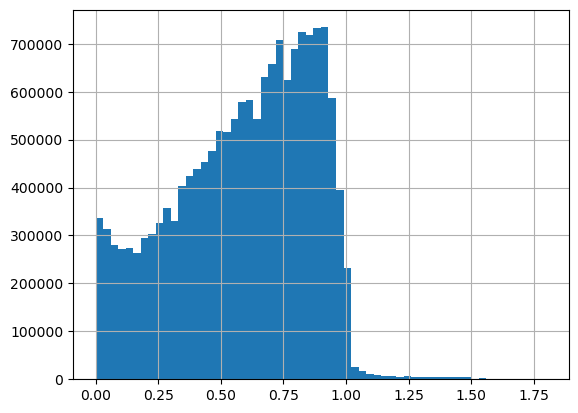

In [13]:
df2["ctx"].hist(bins=60)

Hacemos descriptiva. Hay algun caso raro mayor a 1, pero vamos a hacer la vista gorda por el momento. Quizas es porque la variable ```capacity``` del segundo dataset depende del tiempo. Es decir la capacidad de las estaciones ha ido cambiando a lo largo del tiempo.

In [14]:
df2["ctx"].describe()

count    1.639054e+07
mean     5.876888e-01
std      2.762063e-01
min      0.000000e+00
25%      3.846154e-01
50%      6.269841e-01
75%      8.152174e-01
max      1.800000e+00
Name: ctx, dtype: float64

Son solo un 0.8% de casos del dataset

In [15]:
len( df2[df2["ctx"]>1] ) / len(df2)

0.00888781130233866

Veamos un ejemplo de prueba para evaluar consistencia de los datos. Cojamos el día 21 de Agosto de 2021:

In [16]:
st1 = df2[(df2["station_id"]==1) & (df2["year"]==2021) & (df2["month"]==8) & (df2["day"]==21)]
st2 = df2[(df2["station_id"]==2) & (df2["year"]==2021) & (df2["month"]==8) & (df2["day"]==21)]
st3 = df2[(df2["station_id"]==20) & (df2["year"]==2021) & (df2["month"]==8) & (df2["day"]==21)]

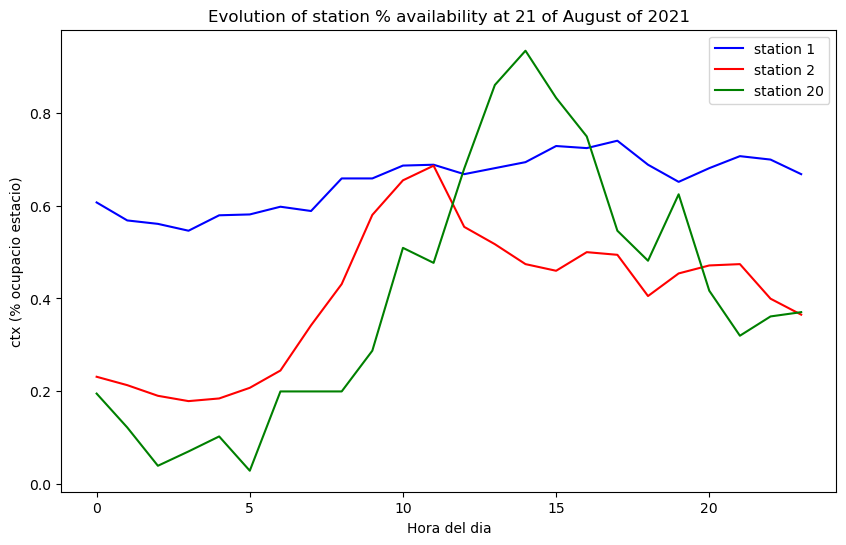

In [17]:
plt.figure(figsize=(10, 6))
plt.plot( st1["hour"],st1["ctx"],color="blue",label="station 1")
plt.plot( st2["hour"],st2["ctx"],color="red",label="station 2")
plt.plot( st3["hour"],st3["ctx"],color="green",label="station 20")
plt.xlabel("Hora del dia")
plt.ylabel("ctx (% ocupacio estacio)")
plt.title("Evolution of station % availability at 21 of August of 2021")
plt.legend()
plt.show()

## Step 2: Variables ```ctx``` lagueadas a -1, -2, -3, -4 horas

Quedemonos con las variables relevantes y ordenemos para visualizar mejor todo:

In [18]:
df3 = df2[["station_id","year","month","day","hour","ctx"]]
df3 = df3.sort_values(by=["station_id","year", "month", "day", "hour"])
df3.head(30)

,station_id,year,month,day,hour,ctx
642,1,2019,12,31,22,0.511111
670,1,2019,12,31,23,0.492593
0,1,2020,1,1,0,0.459259
27,1,2020,1,1,1,0.394444
54,1,2020,1,1,2,0.346296
81,1,2020,1,1,3,0.283333
108,1,2020,1,1,4,0.364815
135,1,2020,1,1,5,0.298148
162,1,2020,1,1,6,0.233333
190,1,2020,1,1,7,0.235185


Obtenemos ```ctx-1```, ```ctx-2```, ```ctx-3``` y ```ctx-4```

In [19]:
df3['ctx-1'] = df3.groupby('station_id')['ctx'].shift(1)
df3['ctx-2'] = df3.groupby('station_id')['ctx'].shift(2)
df3['ctx-3'] = df3.groupby('station_id')['ctx'].shift(3)
df3['ctx-4'] = df3.groupby('station_id')['ctx'].shift(4)

df3.head(30)

,station_id,year,month,day,hour,ctx,ctx-1,ctx-2,ctx-3,ctx-4
642,1,2019,12,31,22,0.511111,NaN,NaN,NaN,NaN
670,1,2019,12,31,23,0.492593,0.511111,NaN,NaN,NaN
0,1,2020,1,1,0,0.459259,0.492593,0.511111,NaN,NaN
27,1,2020,1,1,1,0.394444,0.459259,0.492593,0.511111,NaN
54,1,2020,1,1,2,0.346296,0.394444,0.459259,0.492593,0.511111
81,1,2020,1,1,3,0.283333,0.346296,0.394444,0.459259,0.492593
108,1,2020,1,1,4,0.364815,0.283333,0.346296,0.394444,0.459259
135,1,2020,1,1,5,0.298148,0.364815,0.283333,0.346296,0.394444
162,1,2020,1,1,6,0.233333,0.298148,0.364815,0.283333,0.346296
190,1,2020,1,1,7,0.235185,0.233333,0.298148,0.364815,0.283333


In [20]:
import pandas as pd


# Encuentra las filas con valores NaN para cada estación
nan_rows = df3[df3.isna().any(axis=1)]

# Agrupa las filas con NaN por estación y encuentra los años correspondientes
estacion_anio_nan = nan_rows.groupby('station_id')['year'].unique()

print(estacion_anio_nan)


station_id
1      [2019, 2020]
2      [2019, 2020]
3      [2019, 2020]
4      [2019, 2020]
5      [2019, 2020]
           ...     
515          [2020]
516          [2020]
517          [2020]
518          [2020]
519          [2020]
Name: year, Length: 506, dtype: object


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# Verificar que las columnas esperadas existen
expected_columns = ['station_id', 'year', 'month', 'day', 'hour', 'ctx', 'ctx-1', 'ctx-2', 'ctx-3', 'ctx-4']
missing_columns = [col for col in expected_columns if col not in df3.columns]
if missing_columns:
    raise KeyError(f"Las siguientes columnas no se encontraron en el DataFrame: {missing_columns}")

# Convertir año, mes, día, hora en una sola columna datetime
df3['datetime'] = pd.to_datetime(df3[['year', 'month', 'day', 'hour']])

# Creación de características temporales adicionales
df3['weekday'] = df3['datetime'].dt.weekday
df3['is_weekend'] = df3['weekday'].isin([5, 6]).astype(int)

# Definir las características y el objetivo
features = ['ctx-4', 'ctx-3', 'ctx-2', 'ctx-1', 'weekday', 'is_weekend']
target = 'ctx'

# Limpieza de datos: manejo de NaN e infinitos
df3.replace([np.inf, -np.inf], np.nan, inplace=True)
df3.dropna(subset=features + [target], inplace=True)

# División de los datos en entrenamiento y prueba
X = df3[features]
y = df3[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización/Estandarización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Modelo: Regresión Lineal
R^2 en entrenamiento: 0.8478784084500235
R^2 en prueba: 0.8478213183710083


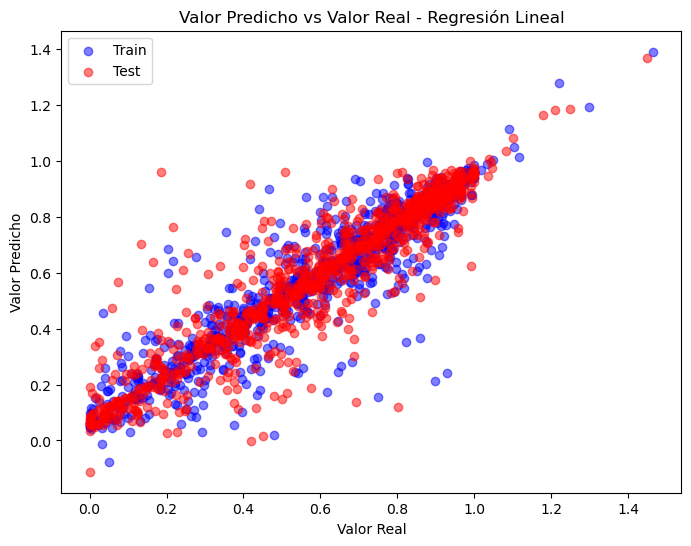

In [32]:
from sklearn.linear_model import LinearRegression

# Modelo de Regresión Lineal
linear_model = LinearRegression()

# Entrenamiento
linear_model.fit(X_train_scaled, y_train)

# Predicción
y_train_pred_linear = linear_model.predict(X_train_scaled)
y_test_pred_linear = linear_model.predict(X_test_scaled)

# Calcular R^2
r2_train_linear = r2_score(y_train, y_train_pred_linear)
r2_test_linear = r2_score(y_test, y_test_pred_linear)
print(f'Modelo: Regresión Lineal')
print(f'R^2 en entrenamiento: {r2_train_linear}')
print(f'R^2 en prueba: {r2_test_linear}')

# Muestreo de datos para graficar
train_sample = np.random.choice(len(y_train), size=sample_size, replace=False)
test_sample = np.random.choice(len(y_test), size=sample_size, replace=False)

y_train_sample = y_train.iloc[train_sample]
y_train_pred_sample = y_train_pred_linear[train_sample]

y_test_sample = y_test.iloc[test_sample]
y_test_pred_sample = y_test_pred_linear[test_sample]

# Graficar valores de train y test
plt.figure(figsize=(8, 6))
plt.scatter(y_train_sample, y_train_pred_sample, alpha=0.5, label='Train', color='blue')
plt.scatter(y_test_sample, y_test_pred_sample, alpha=0.5, label='Test', color='red')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Valor Predicho vs Valor Real - Regresión Lineal')
plt.legend()
plt.show()




Modelo: Ridge
R^2 en entrenamiento: 0.8478784084499376
R^2 en prueba: 0.8478213179893663


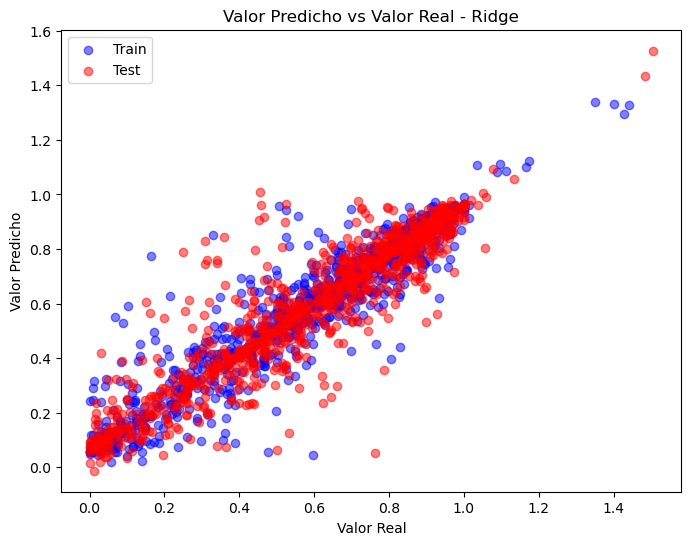

In [30]:
from sklearn.linear_model import Ridge

# Modelo Ridge
ridge_model = Ridge()

# Entrenamiento
ridge_model.fit(X_train_scaled, y_train)

# Predicción
y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

# Calcular R^2
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
print(f'Modelo: Ridge')
print(f'R^2 en entrenamiento: {r2_train_ridge}')
print(f'R^2 en prueba: {r2_test_ridge}')

# Muestreo de datos para graficar
train_sample = np.random.choice(len(y_train), size=sample_size, replace=False)
test_sample = np.random.choice(len(y_test), size=sample_size, replace=False)

y_train_sample = y_train.iloc[train_sample]
y_train_pred_sample_ridge = y_train_pred_ridge[train_sample]

y_test_sample = y_test.iloc[test_sample]
y_test_pred_sample_ridge = y_test_pred_ridge[test_sample]

# Graficar valores de train y test
plt.figure(figsize=(8, 6))
plt.scatter(y_train_sample, y_train_pred_sample_ridge, alpha=0.5, label='Train', color='blue')
plt.scatter(y_test_sample, y_test_pred_sample_ridge, alpha=0.5, label='Test', color='red')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Valor Predicho vs Valor Real - Ridge')
plt.legend()
plt.show()


Modelo: Decision Tree
R^2 en entrenamiento: 0.9965021760329601
R^2 en prueba: 0.6951673574872401


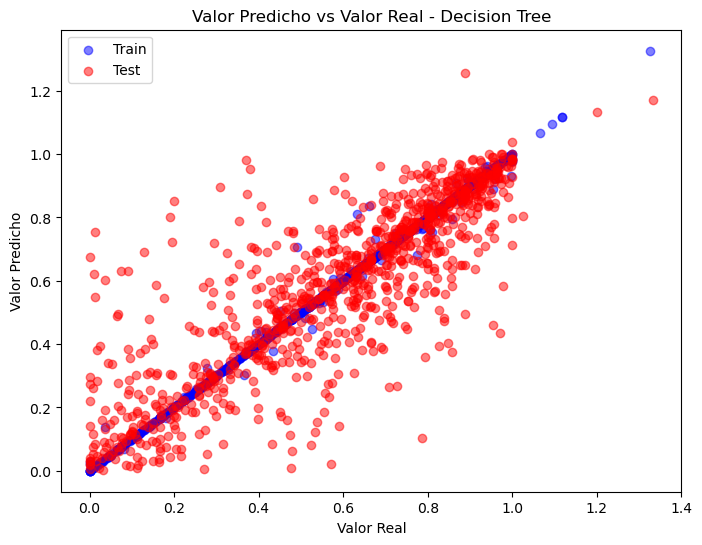

In [31]:
from sklearn.tree import DecisionTreeRegressor

# Modelo de Árbol de Decisión
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Entrenamiento
decision_tree_model.fit(X_train_scaled, y_train)

# Predicción
y_train_pred_tree = decision_tree_model.predict(X_train_scaled)
y_test_pred_tree = decision_tree_model.predict(X_test_scaled)

# Calcular R^2
r2_train_tree = r2_score(y_train, y_train_pred_tree)
r2_test_tree = r2_score(y_test, y_test_pred_tree)
print(f'Modelo: Decision Tree')
print(f'R^2 en entrenamiento: {r2_train_tree}')
print(f'R^2 en prueba: {r2_test_tree}')

# Muestreo de datos para graficar
train_sample = np.random.choice(len(y_train), size=sample_size, replace=False)
test_sample = np.random.choice(len(y_test), size=sample_size, replace=False)

y_train_sample = y_train.iloc[train_sample]
y_train_pred_sample_tree = y_train_pred_tree[train_sample]

y_test_sample = y_test.iloc[test_sample]
y_test_pred_sample_tree = y_test_pred_tree[test_sample]

# Graficar valores de train y test
plt.figure(figsize=(8, 6))
plt.scatter(y_train_sample, y_train_pred_sample_tree, alpha=0.5, label='Train', color='blue')
plt.scatter(y_test_sample, y_test_pred_sample_tree, alpha=0.5, label='Test', color='red')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Valor Predicho vs Valor Real - Decision Tree')
plt.legend()
plt.show()


In [33]:

# Valores de rendimiento de los modelos
models = ['Linear Regression', 'Ridge', 'Decision Tree']
r2_train = [r2_train_linear, r2_train_ridge, r2_train_tree]
r2_test = [r2_test_linear, r2_test_ridge, r2_test_tree]

# Mostrar los valores de rendimiento
print("Modelo\t\t\tR^2 en entrenamiento\t\tR^2 en prueba")
print("-" * 60)
for model, r2_train_value, r2_test_value in zip(models, r2_train, r2_test):
    print(f"{model.ljust(20)}\t{r2_train_value:.6f}\t\t\t{r2_test_value:.6f}")


Modelo			R^2 en entrenamiento		R^2 en prueba
------------------------------------------------------------
Linear Regression   	0.847878			0.847821
Ridge               	0.847878			0.847821
Decision Tree       	0.996502			0.695167
